In [6]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
# Initialize wandb API
api = wandb.Api()

In [21]:
runs = [('fielding-lab/clip-stats/85jv6h26','RN50'), ('fielding-lab/clip-stats/vaa0rtx0', 'ViT-B-16'), ('fielding-lab/obb-stats/02vhjcaa', '960'), ('fielding-lab/obb-stats/8bdstwot', '1280')]
history = {}
summary = {}
for r, label in runs:
    # Retrieve a specific run
    run = api.run(r)
    # Get the history (logged metrics)
    history[label] = run.history()
    history[label]['Timestamp'] -= history[label]['Timestamp'][0]
    summary[label] = run.summary

In [18]:
history['RN50']

,Memory Usage (MB),CPU Frequency (MHz),_step,_runtime,Timestamp,_timestamp,CPU Usage (%)
0,421.054688,1500,0,1.659614,0.000000,1.723608e+09,33.3
1,568.093750,1500,1,2.763290,1.107187,1.723608e+09,25.0
2,665.425781,1500,2,3.866809,2.210909,1.723608e+09,25.0
3,810.281250,1500,3,4.970479,3.314301,1.723608e+09,25.0
4,810.273438,1500,4,6.074120,4.418082,1.723608e+09,26.8
...,...,...,...,...,...,...,...
105,2014.460938,1500,105,118.350515,116.693988,1.723608e+09,100.0
106,2014.710938,1500,106,119.457893,117.802730,1.723608e+09,0.0
107,2014.710938,1500,107,120.560508,118.905228,1.723608e+09,0.0
108,2014.707031,1500,108,121.663127,120.007794,1.723608e+09,0.0


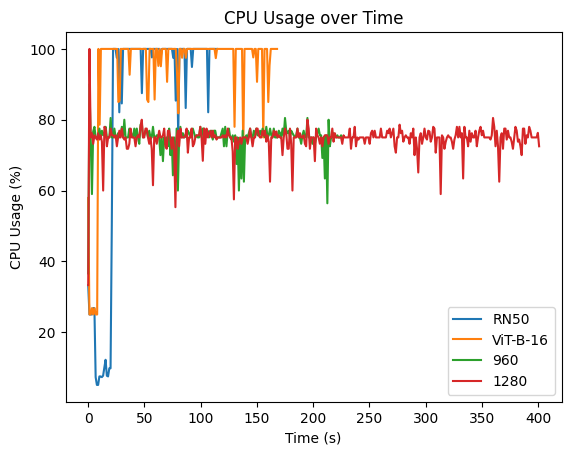

In [25]:
# Plot CPU Usage
for r, label in runs:
    plt.plot(history[label]['Timestamp'][:-6], history[label]['CPU Usage (%)'][:-6], label=label)
plt.xlabel('Time (s)')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage over Time')
plt.legend()
plt.show()

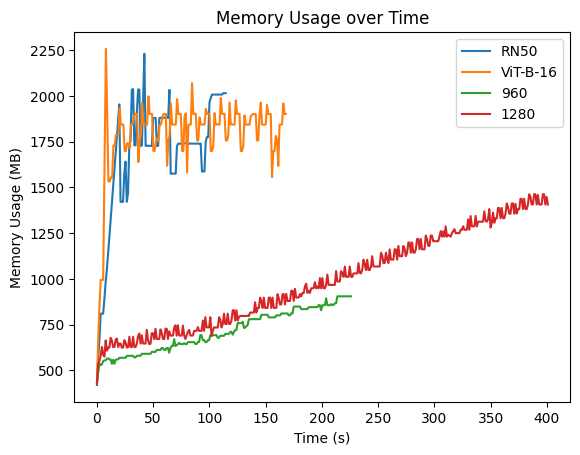

In [26]:
# Plot CPU Usage
for r, label in runs:
    plt.plot(history[label]['Timestamp'][:-6], history[label]['Memory Usage (MB)'][:-6], label=label)
plt.xlabel('Time (s)')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage over Time')
plt.legend()
plt.show()

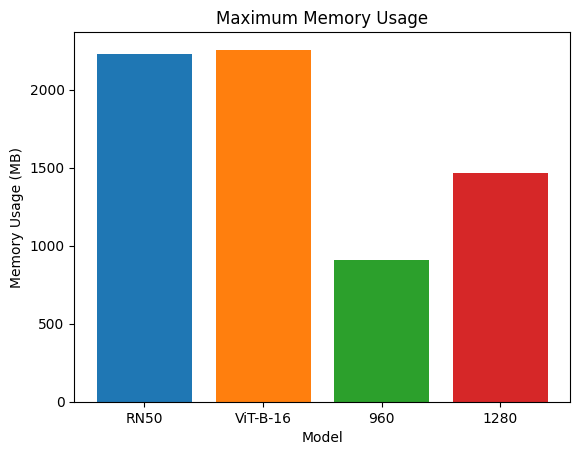

In [36]:
for r, label in runs:
    plt.bar(label, history[label]['Memory Usage (MB)'].max())
plt.xlabel('Model')
plt.ylabel('Memory Usage (MB)')
plt.title('Maximum Memory Usage')
plt.show()

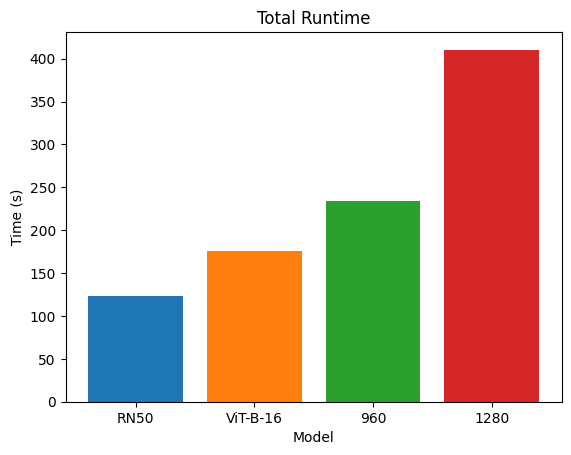

In [37]:
for r, label in runs:
    plt.bar(label, summary[label]['_runtime'])
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.title('Total Runtime')
plt.show()